Spatial Working Memory Implementation of (Compte et. al.)
===============================================

Modified to use simplified neuron model with a single neurotransmitter receptor type.

Excersise from the book Neuronal Dynamics From single neurons to networks and models of cognition, Chapter 18, by Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski
Detailed excersise page: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html
The model has been introduced by Compte et. al. [1]. The parameters used here differ from the original paper. They are changed such that we can still study some effects while simulating a small network.
[1] Compte, A., Brunel, N., Goldman-Rakic, P. S., & Wang, X. J. (2000). Synaptic mechanisms and network dynamics underlying spatial working memory in a cortical network model. Cerebral Cortex, 10(9), 910-923.

In [1]:
# Load libraries

# Compatibility between Python 2 and Python 3
from __future__ import division, print_function, unicode_literals, absolute_import

%matplotlib inline
import math
import numpy as np
from brian2 import *

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from neurodynex.working_memory_network import wm_model
from neurodynex.working_memory_network import wm_model_modified
from neurodynex.working_memory_network import wm_model_modified_simplified

from neurodynex.tools import plot_tools

from utility_functions import *

import pandas as pd
from scipy.optimize import curve_fit # for doing regression
from sklearn.metrics import r2_score # for measuring fit error

Run the simulation for custom ring attractor parameters
------------------------------------------------------------------

N_excitatory=1024, N_inhibitory=256, N_extern_poisson=1000, weight_scaling_factor=2.0, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=70. * pamp, t_stimulus_start=0. * second, t_stimulus_duration=0. * second

WARNING    /Users/john/Library/Python/2.7/lib/python/site-packages/brian2/units/fundamentalunits.py:207: RuntimeWarning: divide by zero encountered in log10
  return func(np.array(x, copy=False), *args, **kwds)
 [py.warnings]
INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1270093d0>)

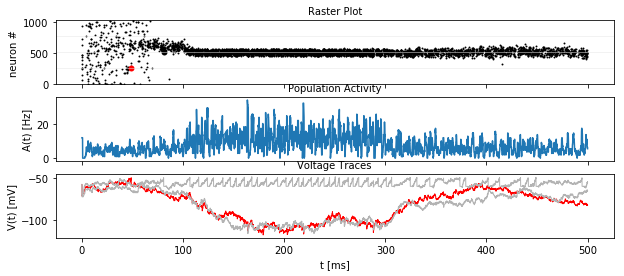

In [2]:
# Run with unstructured Poisson input of higher impulse rate (all neurons receive similar activity)
sim_time_duration    = 500. * ms
t_stimulus_start     = 100*ms
t_stimulus_duration  = 200*ms
stimulus_center_deg  = 180
stimulus_width_deg   = 40
N_excitatory         = 1024
N_inhibitory         = 256
weight_scaling_factor= 2.
sigma_weight_profile = 20.
stimulus_strength    = 0.07 * namp
stimulus_strength    = 0.5 * namp
poisson_firing_rate  = 2.3 * Hz
Jpos_excit2excit     = 1.6
# Unused variables beyond here
G_inhib2inhib        = 0.3584 * nS
G_inhib2excit        = 0.4676 * nS
G_excit2excit        = 0.13335 * nS
G_excit2inhib        = 0.12264 * nS

J_inhib2inhib    = 0.3 / 1000
J_inhib2excit    = 0.3 / 1000
Jpos_excit2excit = 0.3 / 1000 # 0.13335 / 1000
J_excit2inhib    = 0.3 / 1000
J_ext2inhib   = 1.0
J_ext2excit   = 1.0

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model_modified_simplified.simulate_wm_simple(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, stimulus_center_deg=stimulus_center_deg,stimulus_width_deg=stimulus_width_deg,N_excitatory=N_excitatory,N_inhibitory=N_inhibitory,weight_scaling_factor=weight_scaling_factor,stimulus_strength=stimulus_strength, G_inhib2inhib=G_inhib2inhib, G_inhib2excit=G_inhib2excit, G_excit2excit=G_excit2excit, G_excit2inhib=G_excit2inhib, J_inhib2inhib = J_inhib2inhib, J_inhib2excit = J_inhib2excit, J_excit2inhib = J_excit2inhib, J_ext2inhib = J_ext2inhib, J_ext2excit = J_ext2excit)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13b9f9150>)

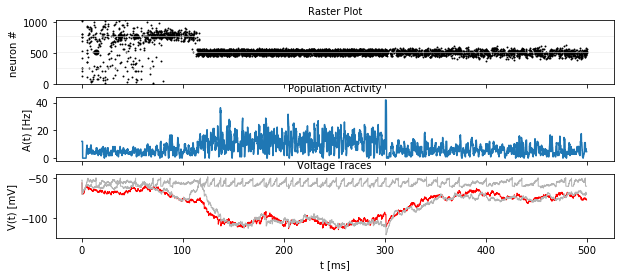

In [17]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model_modified_simplified.simulate_wm_simple(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, stimulus_center_deg=stimulus_center_deg,stimulus_width_deg=stimulus_width_deg,N_excitatory=N_excitatory,N_inhibitory=N_inhibitory,weight_scaling_factor=weight_scaling_factor,stimulus_strength=stimulus_strength, G_inhib2inhib=G_inhib2inhib, G_inhib2excit=G_inhib2excit, G_excit2excit=G_excit2excit, G_excit2inhib=G_excit2inhib, J_inhib2inhib = J_inhib2inhib, J_inhib2excit = J_inhib2excit, J_excit2inhib = J_excit2inhib, J_ext2inhib = J_ext2inhib, J_ext2excit = J_ext2excit,         tau_excit = 20*ms, tau_inhib = 10*ms)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)